In [1]:
import pygad
import numpy as np
import pandas as pd
from MP3NoiseEvalClass import MP3NoiseEvalClass
import argparse
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", "Possible clipped samples in output.")

## Loading Audio

In [3]:
Mixing_Path = '/home/codecrack/Jnotebook/44k1/Reggea'
Noise_Generator_MP3 = MP3NoiseEvalClass(Mixing_Path)
Referece_File_Normalise = Noise_Generator_MP3.TestNoisedFullTrack([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],"Reference_Normalise.wav",isNormalised=True)
Referece_File_UNNormalise = Noise_Generator_MP3.TestNoisedFullTrack([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],"Reference_UNNormalise.wav",isNormalised=False)

print(f"Referece_File_Normalise:{Referece_File_Normalise}")
print(f"Referece_File_UNNormalise:{Referece_File_UNNormalise}")

Vocal duration orginal is 17.46267573696145 seconds, now is the 8.0, the audio changing to the MONO
Drum duration orginal is 17.46267573696145 seconds, now is the 8.0, the audio changing to the MONO
Bass duration orginal is 17.46267573696145 seconds, now is the 8.0, the audio changing to the MONO
Other duration orginal is 17.46267573696145 seconds, now is the 8.0,  the audio changing to the MONO
Mixing File Load Sucessful
Referece_File_Normalise:/home/codecrack/Jnotebook/44k1/Reggea/Mixing_Result/Reference_Normalise.wav
Referece_File_UNNormalise:/home/codecrack/Jnotebook/44k1/Reggea/Mixing_Result/Reference_UNNormalise.wav


## Loading Para

In [14]:
num_generations = 200
num_parents_mating = 2
num_genes = 12
sol_per_pop = 10

noise_low_boudary = 60
noise_high_boudary = 90
noise_step = 1
clipping_low_boudary = 0
clipping_high_boudary = 3.1
clipping_step = 0.1
limiter_low_boudary = 0
limiter_high_boudary = 3.1
limiter_step = 0.1


v_noise_gene_space = {"low": noise_low_boudary, "high": noise_high_boudary, "step":noise_step}
v_clipping_gene_space = {"low": clipping_low_boudary, "high": clipping_high_boudary, "step":clipping_step}
v_limiterII_gene_space = {"low": limiter_low_boudary, "high": limiter_high_boudary, "step":limiter_step}

d_noise_gene_space = {"low": noise_low_boudary, "high": noise_high_boudary, "step":noise_step}
d_clipping_gene_space = {"low": clipping_low_boudary, "high": clipping_high_boudary, "step":clipping_step}
d_limiterII_gene_space = {"low": limiter_low_boudary, "high": limiter_high_boudary, "step":limiter_step}

b_noise_gene_space = {"low": noise_low_boudary, "high": noise_high_boudary, "step":noise_step}
b_clipping_gene_space = {"low": clipping_low_boudary, "high": clipping_high_boudary, "step":clipping_step}
b_limiterII_gene_space = {"low": limiter_low_boudary, "high": limiter_high_boudary, "step":limiter_step}

o_noise_gene_space = {"low": noise_low_boudary, "high": noise_high_boudary, "step":noise_step}
o_clipping_gene_space = {"low": clipping_low_boudary, "high": clipping_high_boudary, "step":clipping_step}
o_limiterII_gene_space = {"low": limiter_low_boudary, "high": limiter_high_boudary, "step":limiter_step}


gene_type = [int, [float, 1],[float, 1],int, [float, 1],[float, 1],int, [float, 1],[float, 1],int, [float, 1],[float, 1]]
gene_space = [v_noise_gene_space,v_clipping_gene_space,v_limiterII_gene_space,
             d_noise_gene_space,d_clipping_gene_space,d_limiterII_gene_space,
             b_noise_gene_space,b_clipping_gene_space,b_limiterII_gene_space,
             o_noise_gene_space,o_clipping_gene_space,o_limiterII_gene_space,]
#mutation_percent_genes = 5
#stop_criteria = "reach_3"
#stop_criteria = "saturate_40"

def on_gen(ga_instance):
    print("Generation : ", ga_instance.generations_completed)
    best_solutions = tuple(ga_instance.best_solutions[ga_instance.generations_completed])
    print(f"The last best Solution : ", {best_solutions})
    best_fitness = ga_instance.best_solutions_fitness[ga_instance.generations_completed-1]
    print(f"Fitness of the last best solution :", {best_fitness})
    
def peaq_func(ga_instance, solution, solution_idx):
    v_int_noise = solution[0]
    v_float_clippingper = solution[1]
    v_float_IIdynamic = solution[2]
    d_int_noise = solution[3]
    d_float_clippingper = solution[4]
    d_float_IIdynamic = solution[5]
    b_int_noise = solution[6]
    b_float_clippingper = solution[7]
    b_float_IIdynamic = solution[8]
    o_int_noise = solution[9]
    o_float_clippingper = solution[10]
    o_float_IIdynamic = solution[11]    
    filename = f'audio_mixing_FN_V_SNR_{v_int_noise}.0_CP_{v_float_clippingper}_IITH_{v_float_IIdynamic}_D_SNR_{d_int_noise}.0_CP_{d_float_clippingper}_IITH_{d_float_IIdynamic}_B_SNR_{b_int_noise}.0_CP_{b_float_clippingper}_IITH_{b_float_IIdynamic}_O_SNR_{o_int_noise}.0_CP_{o_float_clippingper}_IITH_{o_float_IIdynamic}.wav'
    Gener_Audio = Noise_Generator_MP3.TestNoisedFullTrack(solution,filename,isNormalised=False)
    #print(Gener_Audio)
    score = Noise_Generator_MP3.MeasurePEAQOutputsVsRef(Gener_Audio,64,Referece_File_UNNormalise)
    #return float(score)
    return abs(round(float(score),2))

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       num_genes = num_genes,
                       on_generation=on_gen,
                       sol_per_pop= sol_per_pop,
                       fitness_func=peaq_func,
                       gene_type = gene_type,
                       gene_space = gene_space,
                       crossover_type="uniform",
                       mutation_percent_genes=25,
                       keep_elitism = 1,
                       save_best_solutions=True,
                       save_solutions=True,
                       parallel_processing=None)

/root/anaconda3/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")
/root/anaconda3/lib/python3.11/site-packages/pygad/pygad.py:1153: UserWarning: Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.
  warnings.warn("Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.")
/root/anaconda3/lib/python3.11/site-packages/pygad/pygad.py:

In [15]:
ga_instance.run()

Generation :  1
The last best Solution :  {(73, 3.0, 1.9, 69, 2.1, 0.7, 85, 2.2, 2.6, 73, 2.0, 0.9)}
Fitness of the last best solution : {0.68}
Generation :  2
The last best Solution :  {(73, 3.0, 1.9, 84, 2.8, 0.9, 60, 2.2, 2.6, 66, 2.0, 1.0)}
Fitness of the last best solution : {0.76}
Generation :  3
The last best Solution :  {(73, 3.0, 1.9, 85, 2.8, 0.9, 60, 2.2, 2.6, 84, 2.0, 0.8)}
Fitness of the last best solution : {0.79}
Generation :  4
The last best Solution :  {(73, 3.0, 1.9, 85, 2.8, 0.9, 60, 2.2, 2.6, 84, 2.0, 0.8)}
Fitness of the last best solution : {0.84}
Generation :  5
The last best Solution :  {(61, 3.0, 1.9, 85, 2.8, 0.1, 60, 2.2, 2.6, 84, 2.0, 2.2)}
Fitness of the last best solution : {0.84}
Generation :  6
The last best Solution :  {(61, 3.0, 1.9, 85, 2.8, 2.6, 80, 2.2, 2.6, 66, 1.5, 0.8)}
Fitness of the last best solution : {0.85}
Generation :  7
The last best Solution :  {(63, 3.0, 2.9, 60, 1.8, 2.6, 60, 2.2, 2.6, 66, 2.0, 2.2)}
Fitness of the last best solution :

Generation :  58
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last best solution : {1.16}
Generation :  59
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last best solution : {1.16}
Generation :  60
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last best solution : {1.16}
Generation :  61
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last best solution : {1.16}
Generation :  62
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last best solution : {1.16}
Generation :  63
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last best solution : {1.16}
Generation :  64
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last best sol

Generation :  115
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last best solution : {1.16}
Generation :  116
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last best solution : {1.16}
Generation :  117
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last best solution : {1.16}
Generation :  118
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last best solution : {1.16}
Generation :  119
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last best solution : {1.16}
Generation :  120
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last best solution : {1.16}
Generation :  121
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last b

Generation :  172
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last best solution : {1.16}
Generation :  173
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last best solution : {1.16}
Generation :  174
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last best solution : {1.16}
Generation :  175
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last best solution : {1.16}
Generation :  176
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last best solution : {1.16}
Generation :  177
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last best solution : {1.16}
Generation :  178
The last best Solution :  {(63, 3.0, 3.0, 61, 2.8, 0.0, 71, 0.9, 2.7, 88, 2.5, 2.7)}
Fitness of the last b

## Try Single

In [30]:
#solution = [80, 0.0, 0.0, 85, 0.0, 0.1, 84, 0.0, 0.3, 82, 1.0, 1.0]  
#3.11
#boundary 80.0 1.0 1.0
#solution = [72, 0.0, 0.0, 67, 0.0, 0.1, 88, 0.0, 0.1, 86, 1.9, 1.9] 
#boundary 3.62 60.0 2.0 2.0
#solution = [80, 0.0, 0.0, 80, 0.0, 0.0, 80, 0.0, 0.0, 86, 1.9, 1.9]
#solution = [87, 0.0, 0.0, 89, 0.0, 0.1, 88, 0.0, 0.3, 85, 1.0, 1.0]
#solution = [80, 1.0, 1.0, 80, 1.0, 1.0,80, 1.0,1.0, 80, 1.0, 1.0]
#solution = [0, 0.0, 0.0, 0, 0.0, 0.0,0, 0.0, 0.0,0, 0.0, 0.0]
solution = [60, 3.0, 3.0, 60, 3.0, 3.0,60, 3.0, 3.0,60, 3.0, 3.0]
#solution = [83, 2.9, 3.0, 61, 3.0, 0.0, 88, 1.4, 2.6, 77, 1.2, 2.4]
v_int_noise = solution[0]
v_float_clippingper = solution[1]
v_float_IIdynamic = solution[2]
d_int_noise = solution[3]
d_float_clippingper = solution[4]
d_float_IIdynamic = solution[5]
b_int_noise = solution[6]
b_float_clippingper = solution[7]
b_float_IIdynamic = solution[8]
o_int_noise = solution[9]
o_float_clippingper = solution[10]
o_float_IIdynamic = solution[11]    
filename = f'audio_mixing_V_SNR_{v_int_noise}.0_CP_{v_float_clippingper}_IITH_{v_float_IIdynamic}_D_SNR_{d_int_noise}.0_CP_{d_float_clippingper}_IITH_{d_float_IIdynamic}_B_SNR_{b_int_noise}.0_CP_{b_float_clippingper}_IITH_{b_float_IIdynamic}_O_SNR_{o_int_noise}.0_CP_{o_float_clippingper}_IITH_{o_float_IIdynamic}.wav'
Gener_Audio = Noise_Generator_MP3.TestNoisedFullTrack(solution,filename,isNormalised=True)
print(Gener_Audio)
score = Noise_Generator_MP3.MeasurePEAQOutputsVsRef(Gener_Audio,64,Referece_File_Normalise)
print(f"PEAQ Result is {score}")

/home/codecrack/Jnotebook/44k1/Reggea/Mixing_Result/audio_mixing_V_SNR_60.0_CP_3.0_IITH_3.0_D_SNR_60.0_CP_3.0_IITH_3.0_B_SNR_60.0_CP_3.0_IITH_3.0_O_SNR_60.0_CP_3.0_IITH_3.0.wav
PEAQ Result is -2.887


In [16]:
Noise_Generator_MP3.MeasurePEAQOutputsVsRef(Referece_File_UNNormalise,64,Referece_File_UNNormalise)

'-0.269'

In [19]:
import audiotools
from audiotools import AudioSignal

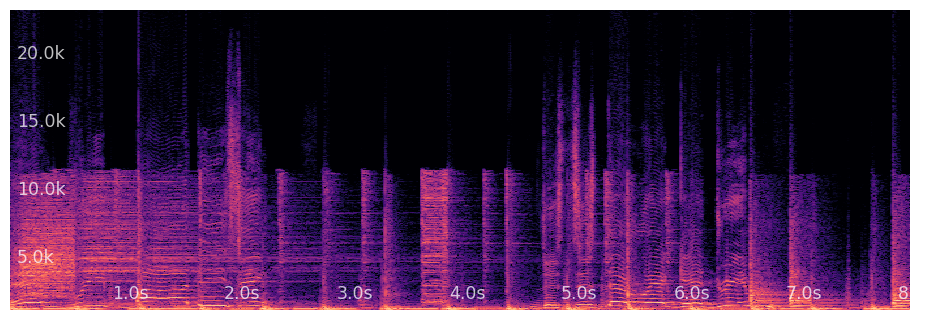

In [21]:
fig = plt.figure(figsize=(16, 2))
spk_ori = AudioSignal(Gener_Audio, offset=0, duration=20)
spk_ori.specshow()
plt.show()
spk_ori.embed(display=False)

### Vocal

In [ ]:
int_noise = 60
float_distortion = 5
float_IIdynamic = 5


#filename = f'audio_mixing_{int_noise}.0_{int_distortion}.0_{int_Idynamic}.0_{int_IIdynamic}.0.wav'
#filename = f'audio_mixing_{int_noise}.0_{int_distortion}_{int_Idynamic}.0_{int_IIdynamic}.0.wav'
filename = f'audio_mixing_NZ_{int_noise}.0_DI_{float_distortion}_IITH_{float_IIdynamic}.wav'
#Gener_Audio = Noise_Generator_MP3.TestNoisedOnlyFile([int_noise,int_distortion,int_Idynamic,int_IIdynamic],Referece_File,filename,True)
Gener_Audio = Noise_Generator_MP3.TestNoisedOnlyVocal([int_noise,float_distortion,float_IIdynamic],filename)
print(Gener_Audio)
score = Noise_Generator_MP3.MeasurePEAQOutputsVsRef(Gener_Audio,64,Referece_File)
print(f"PEAQ Result is {score}")

### Drum

In [ ]:
int_noise = 60
float_distortion = 1
int_Idynamic = 0
int_IIdynamic = 0

#filename = f'audio_mixing_{int_noise}.0_{int_distortion}.0_{int_Idynamic}.0_{int_IIdynamic}.0.wav'
#filename = f'audio_mixing_{int_noise}.0_{int_distortion}_{int_Idynamic}.0_{int_IIdynamic}.0.wav'
filename = f'audio_mixing_NZ_{int_noise}.0_DI_{float_distortion}_ITH_{int_Idynamic}.0_IITH_{int_IIdynamic}.0.wav'
#Gener_Audio = Noise_Generator_MP3.TestNoisedOnlyFile([int_noise,int_distortion,int_Idynamic,int_IIdynamic],Referece_File,filename,True)
Gener_Audio = Noise_Generator_MP3.TestNoisedOnlyDrum([int_noise,float_distortion,int_Idynamic,int_IIdynamic],filename)
print(Gener_Audio)
score = Noise_Generator_MP3.MeasurePEAQOutputsVsRef(Gener_Audio,64,Referece_File)
print(f"PEAQ Result is {score}")

### Bass

In [ ]:
int_noise = 60
float_distortion = 1
int_Idynamic = 0
int_IIdynamic = 0

#filename = f'audio_mixing_{int_noise}.0_{int_distortion}.0_{int_Idynamic}.0_{int_IIdynamic}.0.wav'
#filename = f'audio_mixing_{int_noise}.0_{int_distortion}_{int_Idynamic}.0_{int_IIdynamic}.0.wav'
filename = f'audio_mixing_NZ_{int_noise}.0_DI_{float_distortion}_ITH_{int_Idynamic}.0_IITH_{int_IIdynamic}.0.wav'
#Gener_Audio = Noise_Generator_MP3.TestNoisedOnlyFile([int_noise,int_distortion,int_Idynamic,int_IIdynamic],Referece_File,filename,True)
Gener_Audio = Noise_Generator_MP3.TestNoisedOnlyBass([int_noise,float_distortion,int_Idynamic,int_IIdynamic],filename)
print(Gener_Audio)
score = Noise_Generator_MP3.MeasurePEAQOutputsVsRef(Gener_Audio,64,Referece_File)
print(f"PEAQ Result is {score}")

### Other

In [ ]:
int_noise = 0
float_distortion = 1
int_Idynamic = 0
int_IIdynamic = 0

#filename = f'audio_mixing_{int_noise}.0_{int_distortion}.0_{int_Idynamic}.0_{int_IIdynamic}.0.wav'
#filename = f'audio_mixing_{int_noise}.0_{int_distortion}_{int_Idynamic}.0_{int_IIdynamic}.0.wav'
filename = f'audio_mixing_NZ_{int_noise}.0_DI_{float_distortion}_ITH_{int_Idynamic}.0_IITH_{int_IIdynamic}.0.wav'
#Gener_Audio = Noise_Generator_MP3.TestNoisedOnlyFile([int_noise,int_distortion,int_Idynamic,int_IIdynamic],Referece_File,filename,True)
Gener_Audio = Noise_Generator_MP3.TestNoisedOnlyOther([int_noise,float_distortion,int_Idynamic,int_IIdynamic],filename)
print(Gener_Audio)
score = Noise_Generator_MP3.MeasurePEAQOutputsVsRef(Gener_Audio,96,Referece_File)
print(f"PEAQ Result is {score}")

In [ ]:
score = Noise_Generator_MP3.MeasurePEAQOutputsVsRef(Referece_File,64,Referece_File)
print(f"PEAQ Result is {score}")

## Generating the DataFrame

In [18]:
score_df = pd.DataFrame(ga_instance.best_solutions_fitness, columns=['score'])
manip_df = pd.DataFrame(ga_instance.best_solutions, columns=['V_Noise_SNR', 'V_Clipping_Percentage', 'V_Limiter_Threshold','D_Noise_SNR', 'D_Clipping_Percentage', 'D_Limiter_Threshold','B_Noise_SNR', 'B_Clipping_Percentage', 'B_Limiter_Threshold','O_Noise_SNR', 'O_Clipping_Percentage', 'O_Limiter_Threshold'])
Evo_Data = pd.concat([score_df, manip_df], axis=1)
#result_df
Evo_Data_Path = '/home/codecrack/Jnotebook/Data/Reggae.Full.Track.Evo.11.May.Round.I.NoNormailize.csv'
Evo_Data.to_csv(Evo_Data_Path, index=False)

In [ ]:
ga_instance.plot_fitness()

In [ ]:
ga_instance.plot_new_solution_rate()

In [ ]:
ga_instance.plot_genes(plot_type="bar",solutions="best")

In [ ]:
ga_instance.plot_genes(plot_type="bar")